In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_auth = pd.read_csv('problem1-auth_data.csv', sep=';')
df_auth.head()

,auth_ts,uid
0,911382223,1
1,932683089,2
2,932921206,2
3,933393015,2
4,933875379,2


In [3]:
df_reg = pd.read_csv('problem1-reg_data.csv', sep=';')
df_reg.head()

,reg_ts,uid
0,911382223,1
1,932683089,2
2,947802447,3
3,959523541,4
4,969103313,5


In [4]:
df_read = pd.read_csv('Проект_1_Задание_2.csv', sep=';')
df_read.head()

,user_id,revenue,testgroup
0,1,0,b
1,2,0,a
2,3,0,a
3,4,0,b
4,5,0,b


## Провери и обработаем данные, если это требуется

In [5]:
df_auth.isnull().sum()

auth_ts    0
uid        0
dtype: int64

In [6]:
df_auth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9601013 entries, 0 to 9601012
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   auth_ts  int64
 1   uid      int64
dtypes: int64(2)
memory usage: 146.5 MB


In [7]:
df_auth['uid'].count()

9601013

In [8]:
df_auth['uid'].nunique()

1000000

In [9]:
df_reg.isnull().sum()

reg_ts    0
uid       0
dtype: int64

In [10]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   reg_ts  1000000 non-null  int64
 1   uid     1000000 non-null  int64
dtypes: int64(2)
memory usage: 15.3 MB


In [11]:
df_reg['uid'].count()

1000000

In [12]:
df_reg['uid'].nunique()

1000000

In [13]:
df_read.isnull().sum()

user_id      0
revenue      0
testgroup    0
dtype: int64

In [14]:
df_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404770 entries, 0 to 404769
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    404770 non-null  int64 
 1   revenue    404770 non-null  int64 
 2   testgroup  404770 non-null  object
dtypes: int64(2), object(1)
memory usage: 9.3+ MB


In [15]:
df_read['user_id'].count()

404770

In [16]:
df_read['user_id'].nunique()

404770

# Задание 1. Retention

In [17]:
df = df_auth.merge(df_reg, how='left', on='uid')
df.head()

,auth_ts,uid,reg_ts
0,911382223,1,911382223
1,932683089,2,932683089
2,932921206,2,932683089
3,933393015,2,932683089
4,933875379,2,932683089


In [18]:
df.isnull().sum()

auth_ts    0
uid        0
reg_ts     0
dtype: int64

In [19]:
df['reg_ts'] = df['reg_ts'].apply(lambda x: pd.Timestamp(x, unit='s').date())
df['auth_ts'] = df['auth_ts'].apply(lambda x: pd.Timestamp(x, unit='s').date())

In [20]:
df

,auth_ts,uid,reg_ts
0,1998-11-18,1,1998-11-18
1,1999-07-22,2,1999-07-22
2,1999-07-25,2,1999-07-22
3,1999-07-31,2,1999-07-22
4,1999-08-05,2,1999-07-22
...,...,...,...
9601008,2020-09-23,1110618,2020-09-23
9601009,2020-09-23,1110619,2020-09-23
9601010,2020-09-23,1110620,2020-09-23
9601011,2020-09-23,1110621,2020-09-23


In [21]:
# переводим данные о времени события в datetime64[ns]
df['auth_ts'] = pd.to_datetime(df['auth_ts'])
df['reg_ts'] = pd.to_datetime(df['reg_ts'])

In [29]:
def retention(df, start, end):
    df['seniority'] = (df['auth_ts'] - df['reg_ts']).dt.days + 1
    reten_df = df.groupby(['reg_ts', 'seniority'], as_index = False) \
    .agg({'uid':'nunique'}).pivot(index='reg_ts', columns='seniority', values='uid')[start:end]

    retention = reten_df.divide(reten_df[1], axis=0).round(3)
    
    plt.figure(figsize=(18,14))
    plt.title('Retention Table')
    sns.heatmap(data=retention.iloc[:,0:31], annot=True, cmap='Blues', fmt='.2f', vmin=0.0, vmax=0.15).set_yticklabels(retention.index)
    
    return reten_df.iloc[:,0:31] 

seniority,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
reg_ts,,,,,,,,,,,,,,,,,,,,,
2020-09-01,1586.0,32.0,65.0,67.0,73.0,102.0,89.0,102.0,65.0,86.0,...,69.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-02,1588.0,40.0,62.0,74.0,90.0,99.0,113.0,100.0,77.0,65.0,...,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-03,1591.0,37.0,86.0,75.0,104.0,111.0,136.0,101.0,87.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-04,1593.0,32.0,58.0,58.0,82.0,102.0,116.0,79.0,85.0,69.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-05,1596.0,44.0,63.0,74.0,87.0,94.0,119.0,78.0,81.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-06,1599.0,50.0,69.0,87.0,90.0,94.0,109.0,97.0,93.0,88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-07,1601.0,47.0,68.0,86.0,81.0,102.0,117.0,84.0,66.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-08,1604.0,28.0,63.0,63.0,78.0,122.0,121.0,106.0,83.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-09,1607.0,28.0,52.0,75.0,92.0,107.0,92.0,95.0,70.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


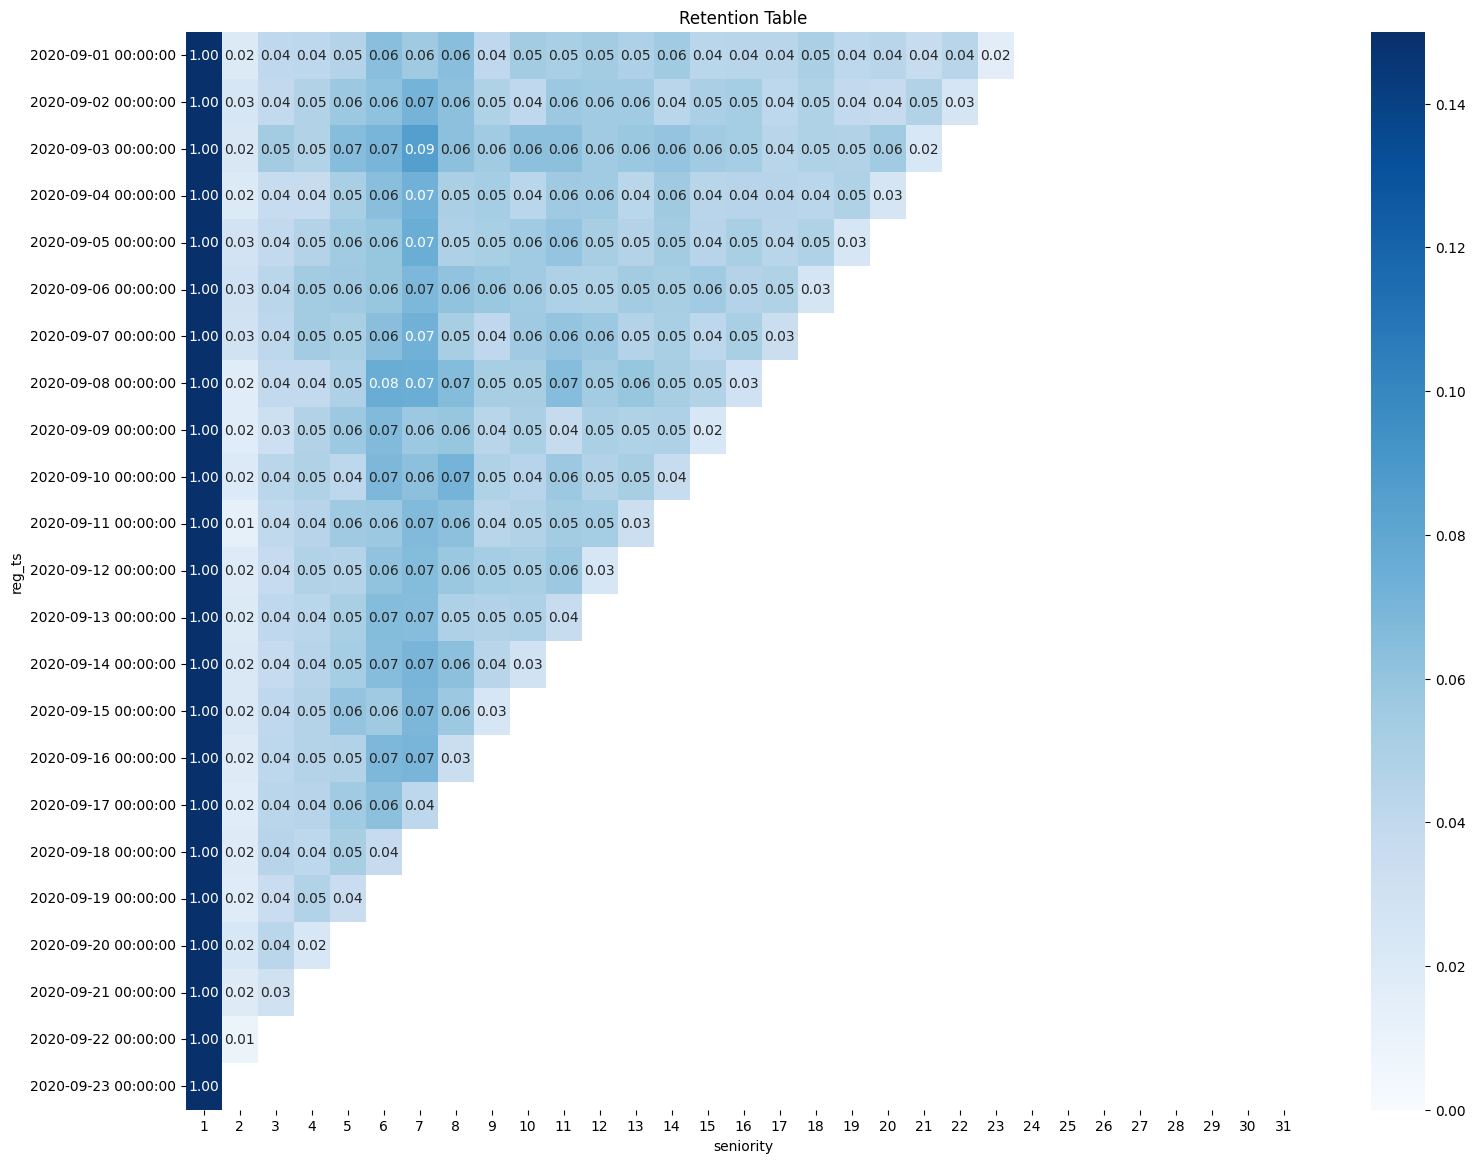

In [30]:
retention(df, '2020-09-01','2020-09-23')

# Задание 2. A/B тесты

In [79]:
df_read.head()

,user_id,revenue,testgroup
0,1,0,b
1,2,0,a
2,3,0,a
3,4,0,b
4,5,0,b


In [82]:
df_a = df_read.query('testgroup == "a"')
df_b = df_read.query('testgroup == "b"')

In [83]:
df_a.query('revenue > 0')

,user_id,revenue,testgroup
72,73,351,a
341,342,290,a
385,386,250,a
416,417,37324,a
712,713,255,a
...,...,...,...
404304,404305,360,a
404315,404316,262,a
404543,404544,369,a
404602,404603,251,a


In [84]:
df_b.query('revenue > 0')

,user_id,revenue,testgroup
160,161,3797,b
377,378,3768,b
386,387,3527,b
551,552,2038,b
913,914,3902,b
...,...,...,...
403843,403844,3383,b
403994,403995,2793,b
404161,404162,2316,b
404193,404194,2998,b


Выручка

In [106]:
df_a['revenue'].sum()

5136189

In [107]:
df_b['revenue'].sum()

5421603

Конверсия

In [138]:
conv_a = round(df_a.query('revenue > 0')['revenue'].count()/df_a['revenue'].count()*100,2)
conv_a

0.95

In [137]:
conv_b = round(df_b.query('revenue > 0')['revenue'].count()/df_b['revenue'].count()*100,2)
conv_b

0.89

Средний чек

In [97]:
round(df_a.query('revenue > 0')['revenue'].sum() / df_a.query('revenue > 0')['revenue'].count(),2)

2664.0

In [98]:
round(df_b.query('revenue > 0')['revenue'].sum() / df_b.query('revenue > 0')['revenue'].count(),2)

3003.66

Максимальный чек

In [104]:
df_a.query('revenue > 0')['revenue'].max()

37433

In [105]:
df_b.query('revenue > 0')['revenue'].max()

4000

Медианный средний чек

In [100]:
df_a.query('revenue > 0')['revenue'].median()

311.0

In [101]:
df_b.query('revenue > 0')['revenue'].median()

3022.0

ARPU:

In [102]:
df_a.query("revenue > 0")['revenue'].sum()/df_a.query("revenue > 0")['user_id'].nunique()

2663.9984439834025

In [103]:
df_b.query("revenue > 0")['revenue'].sum()/df_b.query("revenue > 0")['user_id'].nunique()

3003.6581717451522

Проведём статистические тесты:

In [35]:
import pingouin as pg
import scipy.stats as ss

In [143]:
pg.ttest(df_a.query("revenue > 0")['revenue'], df_b.query("revenue > 0")['revenue'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.64463,1943.481522,two-sided,0.100208,"[-744.7, 65.38]",0.052132,0.142,0.356381


p > 0.05, значит разница статистически не значима

Мы видим, что в группе А есть большое значение, которое мешает тестам, удалим его

In [133]:
df_test = df_a

In [134]:
df_test['revenue'].max()

37433

In [135]:
df_test = df_test[df_test['revenue'] < 37433]

In [136]:
pg.ttest(df_test.query("revenue > 0")['revenue'], df_b.query("revenue > 0")['revenue'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.737744,1942.582992,two-sided,0.082414,"[-761.4, 45.99]",0.055104,0.166,0.39059


P-value уменьшилось, но всё равно не хватает, чтобы отклонить нулевую гипотезу, что разница статистически значима

In [37]:
# Проверим конверсию на статистическую значимость
df_read['CR'] = df_read.revenue.apply(lambda x: 'yes' if x > 0 else 'no')
pd.crosstab(df_read.CR, df_read.testgroup)

testgroup,a,b
CR,,
no,200175,200862
yes,1928,1805


In [39]:
stat, p, dof, expected = ss.chi2_contingency(pd.crosstab(df_read.CR, df_read.testgroup))
p

0.03647561892312613

Так как p-value < 0.05, то делаем вывод, что разница конверсий статистически значима

## Вывод: ##
Выручка, средний чек, ARPU выросли, однако разница статистически не значима. Однако при этом конверсия уменьшилась, при этом эта разница статистически значима. Возможно стоит провести ещё один A/B тест. На основе данных, которые у нас есть я бы отталкивался от предпочтений компании, что для них важнее, на какие метри она ориентируется. На мой взгляд я бы дал шанс новому предложению.

# Задание 3. 
 В игре Plants & Gardens каждый месяц проводятся тематические события, ограниченные по времени. В них игроки могут получить уникальные предметы для сада и персонажей, дополнительные монеты или бонусы. Для получения награды требуется пройти ряд уровней за определенное время. С помощью каких метрик можно оценить результаты последнего прошедшего события?

 Предположим, в другом событии мы усложнили механику событий так, что при каждой неудачной попытке выполнения уровня игрок будет откатываться на несколько уровней назад. Изменится ли набор метрик оценки результата? Если да, то как?

**Среднее количество уровней, завершенных игроками**: эта метрика показывает, сколько в средней уровней завершили игроки.

**Количество участников события**: эта метрика показывает, насколько событие было популярным среди игроков.

**Количество игроков, получивших награду**: эта метрика показывает, насколько игрокам удалось выполнить условия события.

**Среднее время прохождения события**: эта метрика показывает, насколько сложным или легким было событие для игроков.

**Отзывы игроков**: эта метрика позволяет узнать, что игрокам понравилось или не понравилось в событии.

---
В случае, если в событии усложнили механику, то набор метрик оценки результата может измениться следующим образом:

Добавится метрика **Количество игроков, откатившихся на несколько уровней назад**: эта метрика позволит оценить, насколько усложненная механика повлияла на прохождение события игроками.

Изменится метрика **Среднее количество уровней, завершенных игроками**: она может уменьшиться из-за усложнения механики.

Изменится метрика **Среднее время прохождения события**: она может увеличиться, так как игрокам потребуется больше времени, чтобы пройти событие с учетом отката.

Также изменится метрика **Количество игроков, получивших награду, несмотря на откат**: она может уменьшиться, так как некоторые игроки, возможно, не получат награды из-за усложненной механики.

Добавить **Среднее количество откатываемых уровней**: эта метрика позволит оценить, насколько часто игрокам приходилось откатываться на несколько уровней назад.